In [1]:
# ES finds gradient feeds it into Adam

In [2]:
%run imports.py

In [136]:
import gym
import numpy as np
import torch

INPUTS = 4
HIDDEN = 8
OUTPUTS = 2
TARGET = 190
POPULATION = 5

env = gym.make('CartPole-v0')
seed = 10
# env.seed(seed); torch.manual_seed(seed); np.random.seed(seed)
env.seed(9); torch.manual_seed(seed); np.random.seed(seed)

def do_seed(seed):
    env.seed(seed); torch.manual_seed(seed); np.random.seed(seed)
    

class Net(torch.nn.Module):
	def __init__(self, inputs, hidden, outputs, target, population):
		super().__init__()
		self.linear1 = torch.nn.Linear(inputs, hidden)
		self.linear2 = torch.nn.Linear(hidden, outputs)
        
	def forward(self, x):
		x = torch.relu(self.linear1(x))
		return self.linear2(x)
        
steps = 200
net = Net(INPUTS, HIDDEN, OUTPUTS, TARGET, POPULATION)
v_original = nn.utils.parameters_to_vector(net.parameters()).detach()

def calc_fitness(v, net=net):
    nn.utils.vector_to_parameters(v, net.parameters())
    episode_reward = 0	
    state = env.reset()
    for s in range(steps):
        # env.render()
        action = torch.argmax(net.forward(torch.FloatTensor(state)))
        state, reward, done, _ = env.step(int(action))
        episode_reward += reward
        if done:
            break
    return episode_reward

sigma = 1e-1
lr=1e-4

def calc_grad(v, n_pop=5):
    eps = torch.randn(n_pop, *v.shape)
    vs = v+eps*sigma
    Fs = torch.tensor([calc_fitness(vi) for vi in vs])
    Fns = (Fs-Fs.mean())/Fs.std()
    
    grad = 1./(n_pop*sigma)*(Fs[:, None]*eps).sum(dim=0)
    return Fs, grad

def run_es(v, n_gen=100, n_pop=5, tqdm=lambda x: x):
    v = v.clone()
    Fss = []
    pbar = tqdm(range(n_gen))
    for i in pbar:
        Fs, grad = calc_grad(v, n_pop=n_pop)
        # print(Fs.min().item(), Fs.mean().item(), Fs.max().item())
        v += lr*grad
        Fss.append(Fs)
        
        thresh = 180
        if Fs.mean()>thresh and (torch.stack(Fss)[-10:].mean(dim=1)>thresh).all():
            Fss.extend([torch.full((n_pop,), fill_value=Fs.mean().item()) for _ in range(n_gen-len(Fss))])
            break
        pbar.set_postfix({'Fs': Fs.mean().item()})
    return torch.stack(Fss)


def run_es_adam(v, n_gen=100, n_pop=5, tqdm=lambda x: x):
    v = v.clone()
    opt = torch.optim.Adam([v], lr=1e-1)
    Fss = []
    pbar = tqdm(range(n_gen))
    for i in pbar:
        Fs, grad = calc_grad(v.detach().clone(), n_pop=n_pop)
        # print(Fs.min().item(), Fs.mean().item(), Fs.max().item())
        v.grad = -grad
        opt.step()
        Fss.append(Fs)
        thresh = 180
        if Fs.mean()>thresh and (torch.stack(Fss)[-10:].mean(dim=1)>thresh).all():
            Fss.extend([torch.full((n_pop,), fill_value=Fs.mean().item()) for _ in range(n_gen-len(Fss))])
            break
        pbar.set_postfix({'Fs': Fs.mean().item()})
    return torch.stack(Fss)

In [137]:
# fits = run_es_adam(v, n_gen=n_gen, n_pop=n_pop, tqdm=tqdm)

In [138]:
# plt.plot(fits.mean(dim=-1).numpy())

In [146]:
fits_es = []
fits_adam = []

n_pop = 5
n_gen = 100
for seed in tqdm(range(40)):
    do_seed(seed)
    v = torch.randn_like(v_original)/10.
    fits_es.append(run_es(v, n_gen=n_gen, n_pop=n_pop, tqdm=tqdm))
    # plt.plot(fits.mean(dim=-1).numpy(), c='b')
    fits_adam.append(run_es_adam(v, n_gen=n_gen, n_pop=n_pop, tqdm=tqdm))
    # plt.plot(fits.mean(dim=-1).numpy(), c='r')
fits_es = torch.stack(fits_es)
fits_adam = torch.stack(fits_adam)

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [147]:
fits_es.shape

torch.Size([40, 100, 5])

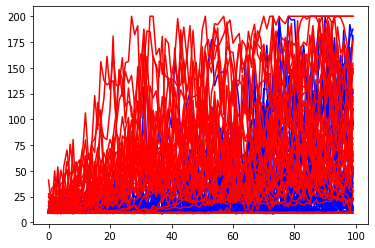

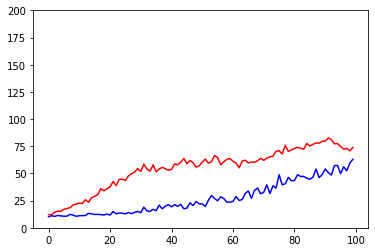

In [149]:
plt.plot(fits_es.mean(dim=-1).numpy().T, c='b')
plt.plot(fits_adam.mean(dim=-1).numpy().T, c='r')
plt.show()

plt.plot(fits_es.mean(dim=-1).mean(dim=0).numpy(), c='b')
plt.plot(fits_adam.mean(dim=-1).mean(dim=0).numpy(), c='r')
plt.ylim(0,200)
plt.show()

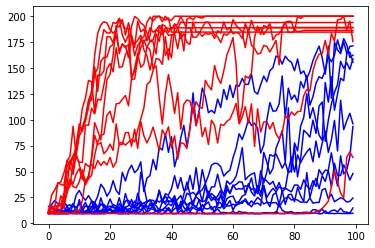

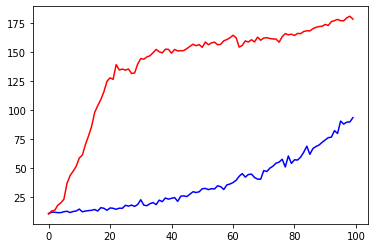

In [142]:
plt.plot(fits_es.mean(dim=-1).numpy().T, c='b')
plt.plot(fits_adam.mean(dim=-1).numpy().T, c='r')
plt.show()

plt.plot(fits_es.mean(dim=-1).mean(dim=0).numpy(), c='b')
plt.plot(fits_adam.mean(dim=-1).mean(dim=0).numpy(), c='r')
plt.show()

In [5]:
import gym
import numpy as np
import torch
from collections import deque


INPUTS = 4
HIDDEN = 8
OUTPUTS = 2
TARGET = 190
POPULATION = 5

ave_reward = deque(maxlen=100)
short_ma = deque(maxlen=5)
long_ma = deque(maxlen=10)

env = gym.make('CartPole-v0')
env.seed(9); torch.manual_seed(1); np.random.seed(1)


class EvolutionStrategies(torch.nn.Module):
	def __init__(self, inputs, hidden, outputs, target, population):
		super(EvolutionStrategies, self).__init__()
		self.linear1 = torch.nn.Linear(inputs, hidden)
		self.linear2 = torch.nn.Linear(hidden, outputs)
		self.population_size = population
		self.sigma = 0.1
		self.learning_rate = 0.0001
		self.counter = 0
		self.rewards = []
		self.score_tracking = deque(maxlen = 100)
		self.master_weights = []
		self.target = target

		for param in self.parameters():
			self.master_weights.append(param.data)
		self.populate()

	def forward(self, x):
		x = torch.relu(self.linear1(x))
		return self.linear2(x)

	def populate(self):
		self.population = []
		for _ in range(self.population_size):
			x = []
			for param in self.parameters():
				x.append(np.random.randn(*param.data.size()))
			self.population.append(x)

	def add_noise_to_weights(self):
		for i, param in enumerate(self.parameters()):
			noise = torch.from_numpy(self.sigma * self.population[self.counter][i]).float()
			param.data = self.master_weights[i] + noise
		self.counter += 1

	def log_reward(self, reward):
		# When we've got enough rewards, evolve the network and repopulate
		self.rewards.append(reward)
		if len(self.rewards) >= self.population_size:
			self.counter = 0
			self.evolve()
			self.populate()
			self.rewards = []
		self.add_noise_to_weights()

	def evolve(self):
		# Multiply jittered weights by normalised rewards and apply to network
		if np.std(self.rewards) != 0:
			normalized_rewards = (self.rewards - np.mean(self.rewards)) / np.std(self.rewards)
			for index, param in enumerate(self.parameters()):
				A = np.array([individual[index] for individual in self.population])
				rewards_pop = torch.from_numpy(np.dot(A.T, normalized_rewards).T).float()
				param.data = self.master_weights[index] + self.learning_rate / (self.population_size * self.sigma) * rewards_pop
				self.master_weights[index] = param.data

		# Adaptive learning rate (work in progress)
		high_score = np.max(self.rewards)
		self.score_tracking.append(high_score)
		self.learning_rate = (self.learning_rate*5 + (self.target - np.mean(self.score_tracking))*0.000005)/6
		self.sigma = self.learning_rate * 10


model = EvolutionStrategies(INPUTS, HIDDEN, OUTPUTS, TARGET, POPULATION)
state = env.reset()
steps = 200
episodes = 30000


for episode in range(episodes):
	episode_reward = 0	
	state = env.reset()

	for s in range(steps):
		# env.render()
		action = torch.argmax(model.forward(torch.FloatTensor(state)))
		state, reward, done, _ = env.step(int(action))
		episode_reward += reward
		if done:
			model.log_reward(episode_reward)
			break

	ave_reward.append(episode_reward)
	short_ma.append(episode_reward)
	long_ma.append(episode_reward)


	if episode % 10 == 0:
		print(episode, 'Average reward: ', np.mean(ave_reward), ' LR: ', model.learning_rate)
		if np.mean(short_ma) < np.mean(long_ma):
			model = EvolutionStrategies(INPUTS, HIDDEN, OUTPUTS, TARGET, POPULATION)
			short_ma.clear()
			long_ma.clear()


	if np.mean(ave_reward) >= env.spec.reward_threshold:
		print('Completed at episode: ', episode)
		break


0 Average reward:  82.0  LR:  0.0001
10 Average reward:  72.18181818181819  LR:  0.00023027777777777782
20 Average reward:  129.95238095238096  LR:  0.0002462345679012346
30 Average reward:  152.5483870967742  LR:  0.0002198851165980796
40 Average reward:  164.1219512195122  LR:  0.0001843993865264442
50 Average reward:  171.15686274509804  LR:  0.0001498514258285492
60 Average reward:  175.88524590163934  LR:  0.00011941071238093694
70 Average reward:  179.28169014084506  LR:  9.373607163206092e-05
80 Average reward:  181.8395061728395  LR:  7.254241085559787e-05
90 Average reward:  183.83516483516485  LR:  5.52296153817469e-05
100 Average reward:  186.47  LR:  4.1144104249020154e-05
Completed at episode:  106
